# Desafio de Inferência [TERA](https://somostera.com/)

## Objetivo

Encontrar relações entre hábitos saudáveis, prática de exercícios e casos de depressão. 

Datasets utilizados:[PQH & PAG](https://drive.google.com/drive/folders/1N4sCFSZDXLYzccP-9t0JXGkF06wiAQS-)  
Dicionários: [PHQ](https://drive.google.com/file/d/1a4bGPp-ZY2zZlqtkF_b_E9cPwiFAUznj/view)  [PAG](https://drive.google.com/file/d/1Qc63Z0t5v7zHKUszWOQlHVCwBWG1Ps7i/view)

## Tratamento dos dados

In [1]:
# Importando bibliotecas que serão utilizadas no projeto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os aquivos dos bancos de dados que foram salvos localmente no computador.
from google.colab import files
uploaded = files.upload()

Saving demo_phq.csv to demo_phq.csv
Saving pag_hei.csv to pag_hei.csv


In [59]:
# Criando os dataframes phq e pag com a as ferramentas da biblioteca pandas.
import io
phq = pd.read_csv(io.BytesIO(uploaded['demo_phq.csv']))
pag = pd.read_csv(io.BytesIO(uploaded['pag_hei.csv']))

2) entendendo o dataset e tratando os dados

In [60]:
# Conhecendo o dataframe phq.
phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [61]:
# Obtendo informações do dataframe phq.
phq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [62]:
# Renomeando colunas.
phq.columns = ['id', 'dpq1', 'dpq2', 'dpq3', 'dpq4', 'dpq5', 
               'dpq6', 'dpq7', 'dpq8', 'dpq9', 'gender', 'age', 
               'race_ethnicity', 'schooling', 'annual_family_income']

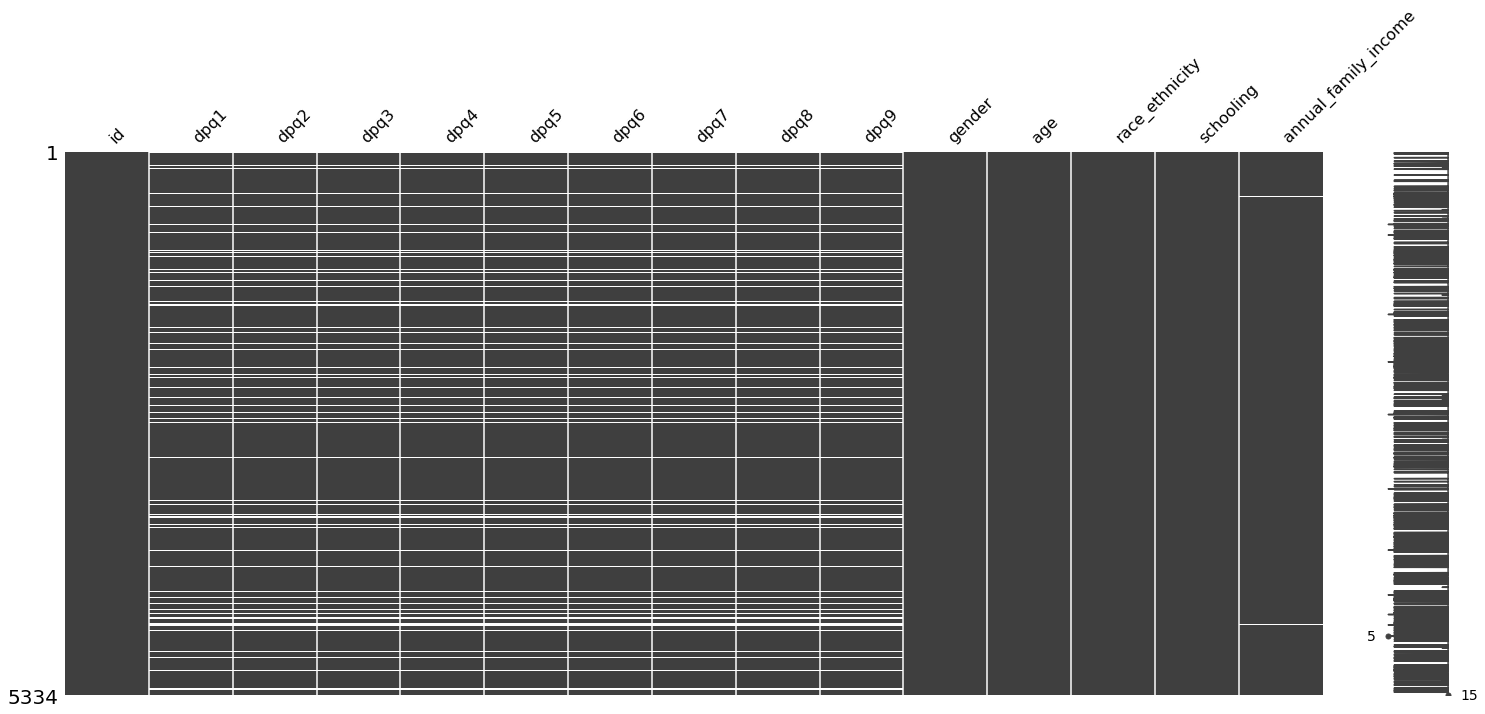

In [63]:
# Verificando dados nulos do dataframe phq.
import missingno as msno
msno.matrix(phq)

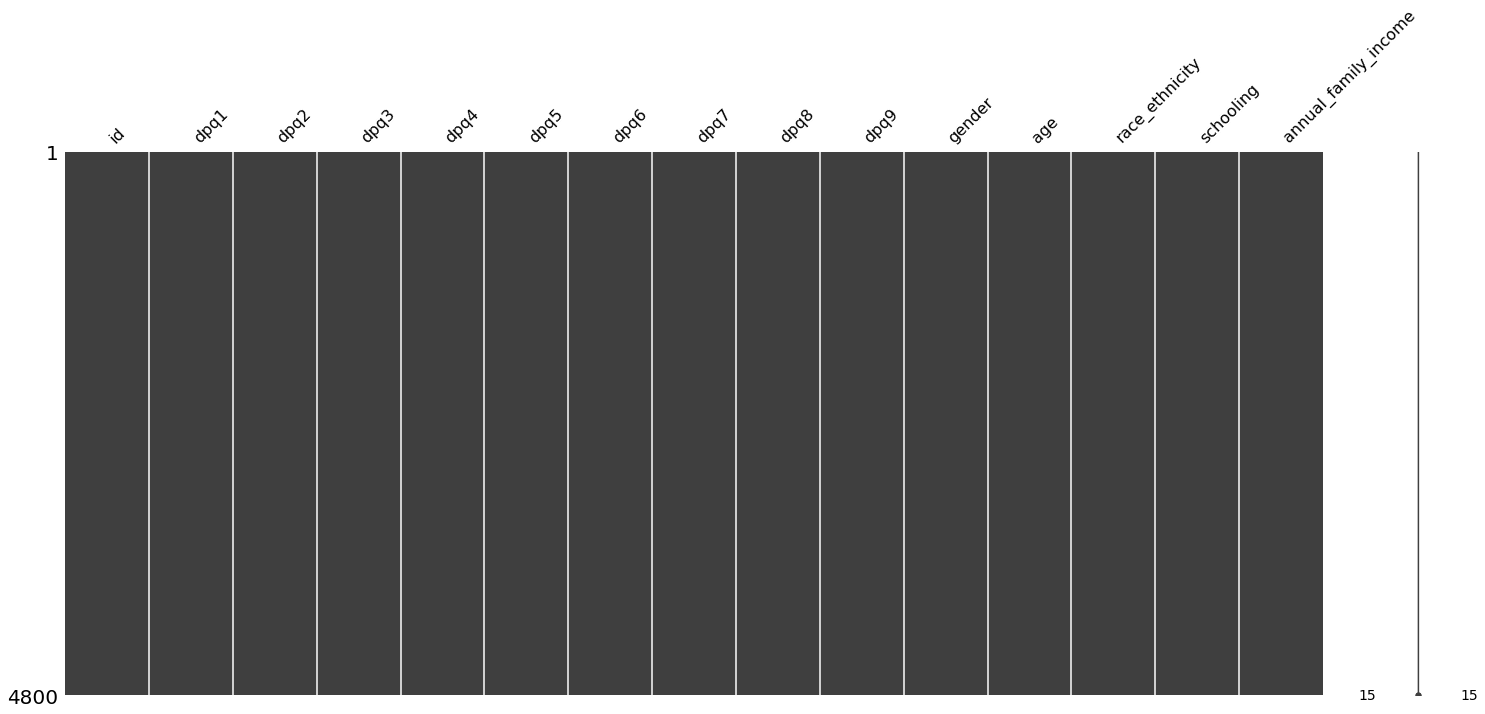

In [64]:
# Este trabalho vai deletar os dados das pessoas que não responderam a pesquisa 
# por entender que a falta deste questionário inviabiliza a correlação entre 
# depressão e hábitos saudáveis, além de que existem menores de idade dentre
# as pessoas que não responderam o questionário, que não serão avaliados aqui.
phq = phq.dropna()
msno.matrix(phq)

In [65]:
# Criando uma lista que corresponde aos nomes das colunas do questionário.
column_headers = list(phq.columns.values)
column_headers = column_headers[1:10]
column_headers

['dpq1', 'dpq2', 'dpq3', 'dpq4', 'dpq5', 'dpq6', 'dpq7', 'dpq8', 'dpq9']

In [ ]:
# Passo a passo para o tratamento de uma coluna no questionário para criar uma
# string que responda se a pessoa respondeu, se recusou ou não sabia responder.
# Este código foi utilizado apenas no desenvolvimento do trabalho, na sequencia
# será utilizada uma função para representá-lo.
'''
phq.insert(loc=2, column='dpq1_answer', value=phq['dpq1'])
phq["dpq1_answer"]=phq["dpq1_answer"].replace(7,'Se recusou')
phq["dpq1_answer"]=phq["dpq1_answer"].replace(9,'Não sabe')
replace_answer = {0 : 'Respondeu', 1 : 'Respondeu', 2 : 'Respondeu', 3 : 'Respondeu'}
phq=phq.replace({"dpq1_answer" : replace_answer})
replace_nan = {7 : np.nan , 9 : np.nan}
phq=phq.replace({"dpq1" : replace_nan})
'''

'\nphq.insert(loc=2, column=\'dpq1_answer\', value=phq[\'dpq1\'])\nphq["dpq1_answer"]=phq["dpq1_answer"].replace(7,\'Se recusou\')\nphq["dpq1_answer"]=phq["dpq1_answer"].replace(9,\'Não sabe\')\nreplace_answer = {0 : \'Respondeu\', 1 : \'Respondeu\', 2 : \'Respondeu\', 3 : \'Respondeu\'}\nphq=phq.replace({"dpq1_answer" : replace_answer})\nreplace_nan = {7 : np.nan , 9 : np.nan}\nphq=phq.replace({"dpq1" : replace_nan})\n'

In [66]:
# Criando a função que insere uma coluna ao lado de cada pergunta dizendo se
# a pessoa respondeu, se recusou ou não sabia responder.
def insert_columns (df, columns_list):
  for coluna in columns_list:
    index = df.columns.get_loc(coluna)
    df.insert(loc=index, column=f'{coluna}_answer', value=df[f'{coluna}'])
    df[f'{coluna}_answer']=df[f'{coluna}_answer'].replace(7.0,'Se recusou')
    df[f'{coluna}_answer']=df[f'{coluna}_answer'].replace(9.0,'Não sabe')
    replace_answer = {0.0 : 'Respondeu', 1.0 : 'Respondeu', 2.0 : 'Respondeu', 3 : 'Respondeu'}
    df = df.replace({f'{coluna}_answer' : replace_answer})
    replace_nan = {7.0 : np.nan , 9.0 : np.nan}
    df = df.replace({f'{coluna}' : replace_nan})
  return df

In [68]:
# Aplicando a função no dataframe phq.
df_phq = insert_columns(phq, column_headers)

In [69]:
# Verificando o dataframe alterado.
df_phq.head()

,id,dpq1_answer,dpq1,dpq2_answer,dpq2,dpq3_answer,dpq3,dpq4_answer,dpq4,dpq5_answer,...,dpq7,dpq8_answer,dpq8,dpq9_answer,dpq9,gender,age,race_ethnicity,schooling,annual_family_income
1,31131,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,...,0.0,Respondeu,0.0,Respondeu,0.0,2,44,4,4,11.0
2,31132,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,...,0.0,Respondeu,0.0,Respondeu,0.0,1,70,3,5,11.0
3,31134,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,...,0.0,Respondeu,0.0,Respondeu,0.0,1,73,3,3,12.0
4,31139,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,...,0.0,Respondeu,0.0,Respondeu,0.0,2,18,2,3,11.0
5,31143,Respondeu,0.0,Respondeu,1.0,Respondeu,1.0,Respondeu,1.0,Respondeu,...,1.0,Respondeu,0.0,Respondeu,0.0,1,19,3,4,11.0


In [70]:
# Conhecendo o dataframe pag.
pag.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [71]:
# Obtendo informações do dataframe pag.
pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [72]:
# Renomeando colunas.
pag.columns = ['id', 'time_pag', 'adherence_pag', 'hei1_total_veg', 
               'hei2_green_bean', 'hei3_total_fruit', 'hei4_whole_fruit', 
               'hei5_whole_grain', 'hei6_total_dairy', 'hei7_total_prot', 
               'hei8_seaplant_prot', 'hei9_fat_acid', 'hei10_sodium', 
               'hei11_refined_grain', 'hei12_saturated_fat', 'hei13_add_sugar', 'hei14_total_score']

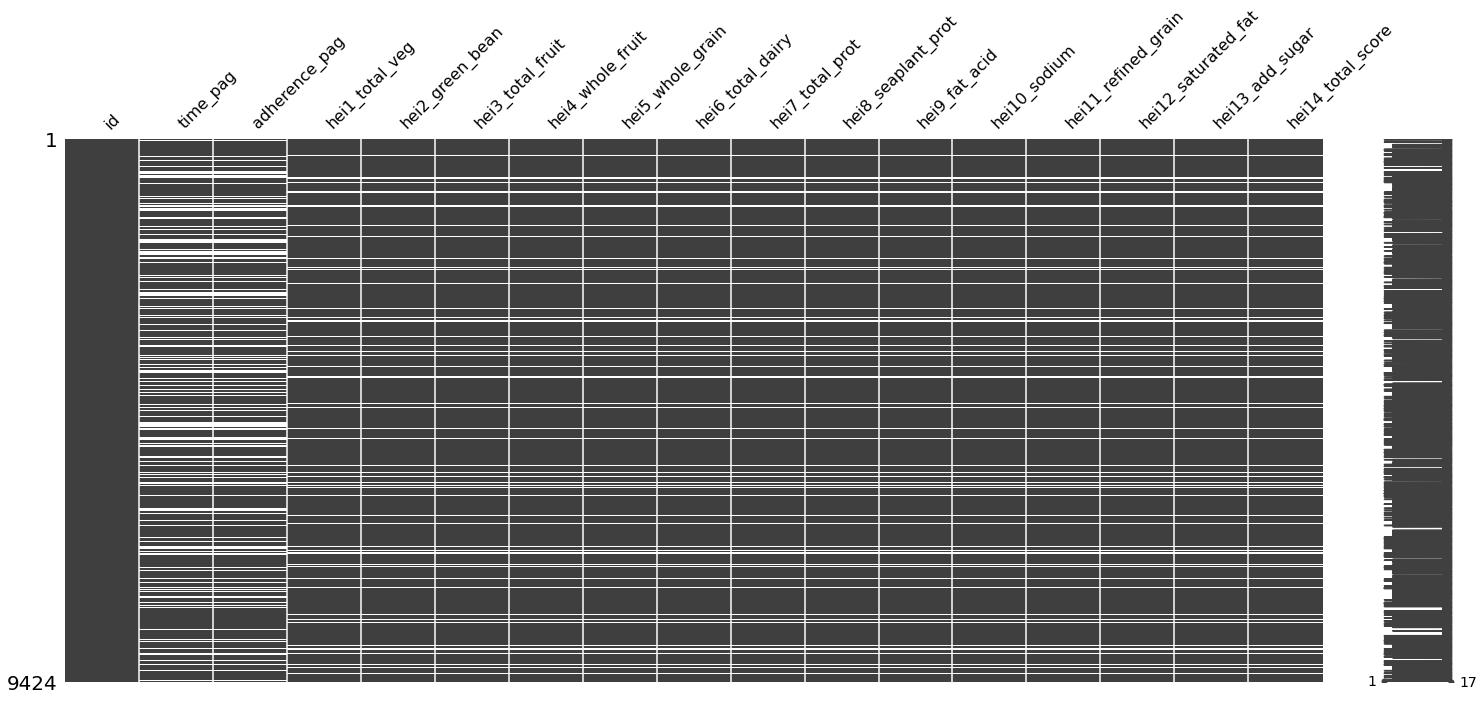

In [73]:
# Verificando dados nulos do dataframe pag.
msno.matrix(pag)

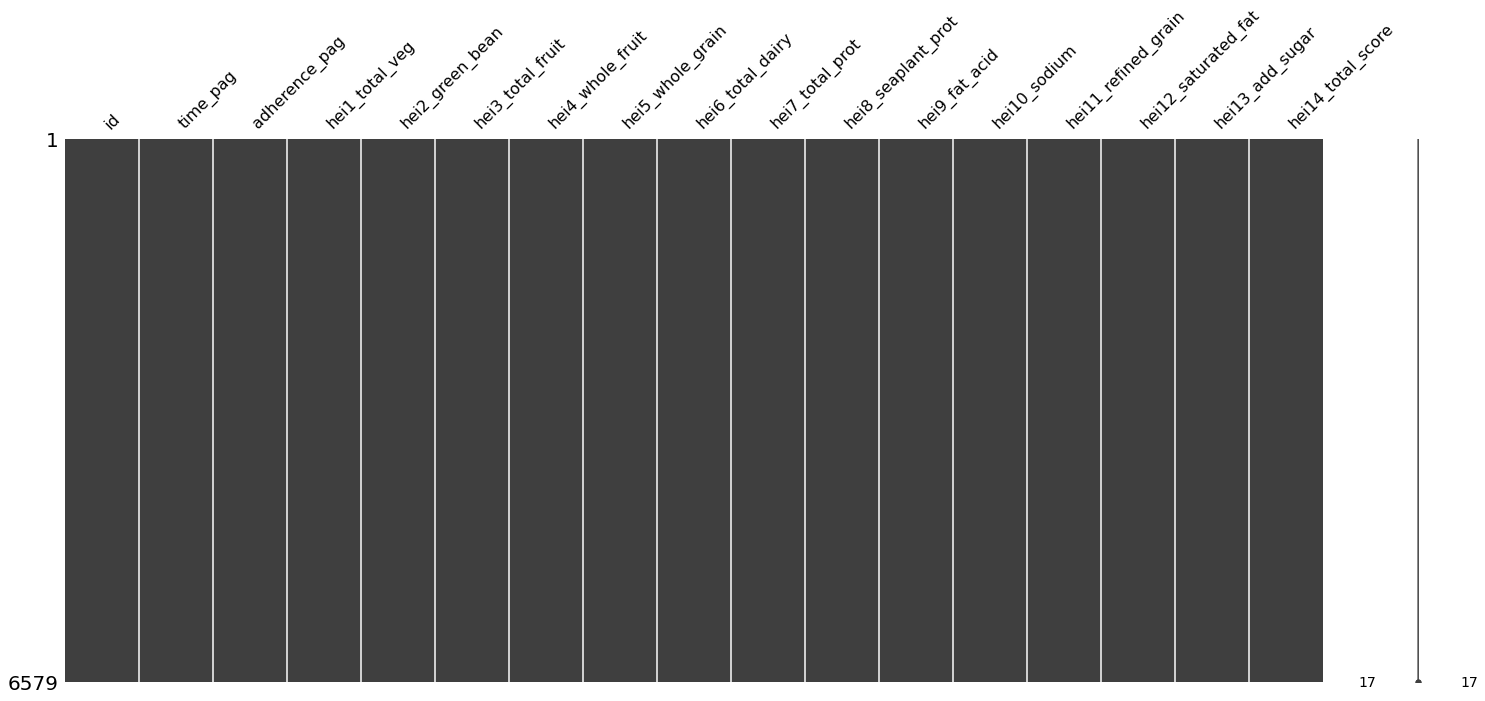

In [74]:
# Este trabalho vai deletar os dados das pessoas que não responderam a pesquisa 
# por entender que a falta deste questionário inviabiliza a correlação entre 
# depressão e hábitos saudáveis.
df_pag = pag.dropna()
msno.matrix(df_pag)

In [75]:
# Combinando os bancos de dados phq e pag.
df = pd.merge(df_phq, df_pag, on='id')

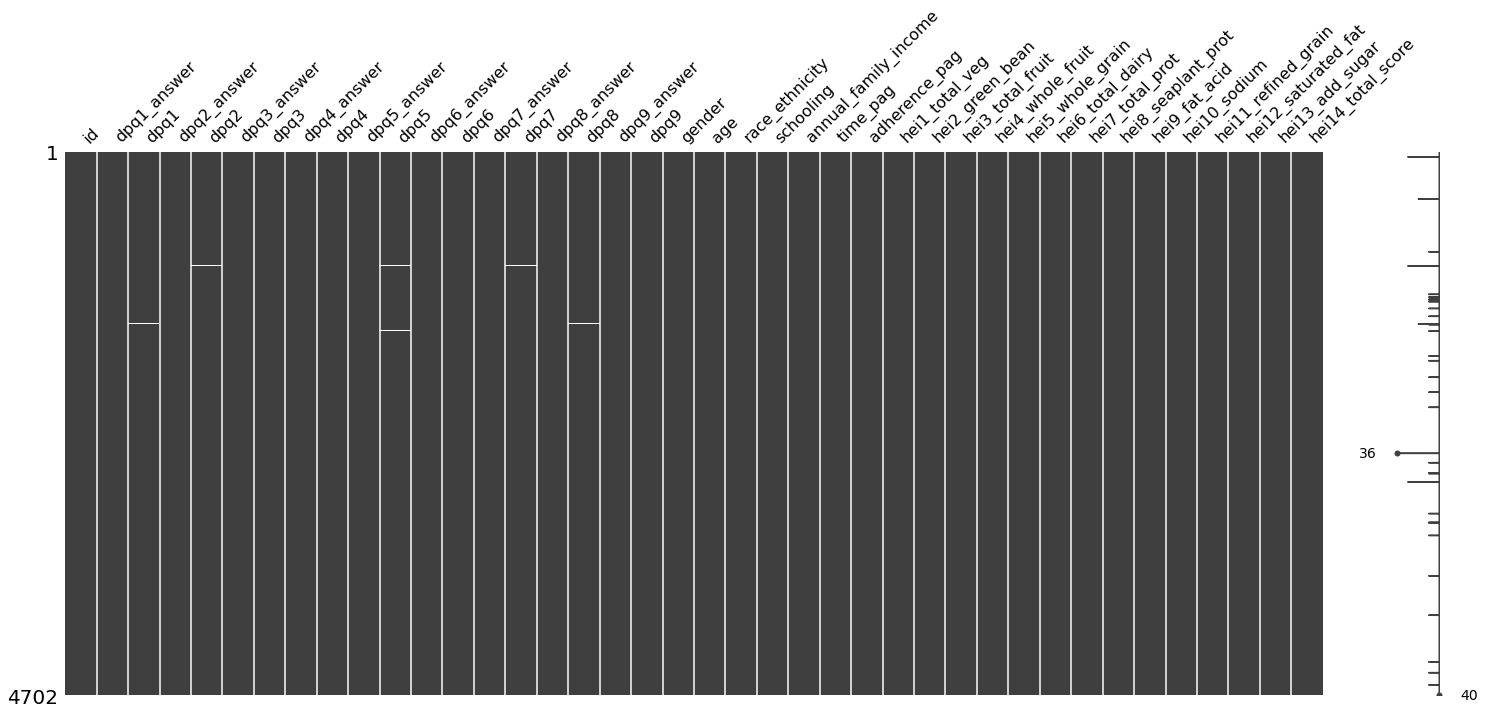

In [76]:
# Verificando se existem dados nulos no dataframe criado.
msno.matrix(df)

In [ ]:
# Conhecendo o dataframe criado que será utilizado nas análises.
df.head()

,id,dpq1,dpq1_answer,dpq2,dpq2_answer,dpq3,dpq3_answer,dpq4,dpq4_answer,dpq5,...,hei5_whole_grain,hei6_total_dairy,hei7_total_prot,hei8_seaplant_prot,hei9_fat_acid,hei10_sodium,hei11_refined_grain,hei12_saturated_fat,hei13_add_sugar,hei14_total_score
0,31131,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,0.0,Respondeu,3.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,0.0,Respondeu,1.0,Respondeu,1.0,Respondeu,1.0,Respondeu,1.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131


In [ ]:
# Obtendo informações do dataframe que será utilizado nas análises.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 0 to 4701
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4702 non-null   int64  
 1   dpq1                  4694 non-null   float64
 2   dpq1_answer           4702 non-null   object 
 3   dpq2                  4697 non-null   float64
 4   dpq2_answer           4702 non-null   object 
 5   dpq3                  4696 non-null   float64
 6   dpq3_answer           4702 non-null   object 
 7   dpq4                  4697 non-null   float64
 8   dpq4_answer           4702 non-null   object 
 9   dpq5                  4699 non-null   float64
 10  dpq5_answer           4702 non-null   object 
 11  dpq6                  4698 non-null   float64
 12  dpq6_answer           4702 non-null   object 
 13  dpq7                  4700 non-null   float64
 14  dpq7_answer           4702 non-null   object 
 15  dpq8                 

In [ ]:
# Criando a coluna "phq9" que representa a soma das colunas dpq1 a dph9.
df['phq9'] = df[column_headers].sum(axis=1)

In [ ]:
# Criando a coluna "phq_grp_name" que classifica entre grupos as pessoas 
# conforme a pontuação total delas no questionário sobre depressão.
def phq_grp_name(x):
    if x < 5:
        return 'sem sintomas'
    elif 5 <= x < 10:
        return 'sintomas leves'
    elif 10 <= x < 15:
        return 'sintomas moderados'
    elif 15 <= x <= 19:
        return 'sintomas moderadamente severos'
    else:
        return 'sintomas severos'

df['phq_grp'] = df['phq9'].apply(phq_grp_name)

In [ ]:
# Criando a coluna "phq_grp_value" que representa com variáveis ordinais a
# classificação feita através da pontuação do questionário sobre depressão.
def phq_grp_value(x):
    if x == 'sem sintomas':
        return 0
    elif x == 'sintomas leves':
        return 1
    elif x == 'sintomas moderados':
        return 2
    elif x == 'sintomas moderadamente severos':
        return 3
    else:
        return 4

df['phq_grp_value'] = df['phq_grp'].apply(phq_grp_value)

In [ ]:
# Obtendo informações do dataframe que foi alterado.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 0 to 4701
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4702 non-null   int64  
 1   dpq1                  4694 non-null   float64
 2   dpq1_answer           4702 non-null   object 
 3   dpq2                  4697 non-null   float64
 4   dpq2_answer           4702 non-null   object 
 5   dpq3                  4696 non-null   float64
 6   dpq3_answer           4702 non-null   object 
 7   dpq4                  4697 non-null   float64
 8   dpq4_answer           4702 non-null   object 
 9   dpq5                  4699 non-null   float64
 10  dpq5_answer           4702 non-null   object 
 11  dpq6                  4698 non-null   float64
 12  dpq6_answer           4702 non-null   object 
 13  dpq7                  4700 non-null   float64
 14  dpq7_answer           4702 non-null   object 
 15  dpq8                 

In [ ]:
# Alterando os valores 2=SIM e 1=NÃO para 1=SIM e 0=NÃO como forma de 
# convenção para as análises que podem ser feitas posteriormente.
df['gender']=df['gender'].replace(1,0)
df['gender']=df['gender'].replace(2,1)
df['gender']

0       1
1       0
2       0
3       1
4       0
       ..
4697    1
4698    1
4699    0
4700    0
4701    0
Name: gender, Length: 4702, dtype: int64

In [ ]:
# Alterando as variáveis sobre "race_ethnicity" numéricas por categóricas 
# conforme está descrito no dicionário do banco de dados
df['race_ethnicity']=df['race_ethnicity'].replace(1,'branco')
df['race_ethnicity']=df['race_ethnicity'].replace(2,'negro')
df['race_ethnicity']=df['race_ethnicity'].replace(3,'latino')
df['race_ethnicity']=df['race_ethnicity'].replace(4,'outro')
df['race_ethnicity']=df['race_ethnicity'].replace(5,'hispânico')
df['race_ethnicity']

In [ ]:
# Alterando as variáveis sobre "schooling" numéricas por categóricas 
# conforme está descrito no dicionário do banco de dados
df['schooling']=df['schooling'].replace(1,'< 9ºano')
df['schooling']=df['schooling'].replace(2,'9º-12º ano')
df['schooling']=df['schooling'].replace(3,'Médio Completo')
df['schooling']=df['schooling'].replace(4,'Superior Incompleto')
df['schooling']=df['schooling'].replace(5,'Superior Completo ou Maior')
df['schooling']=df['schooling'].replace(7,'Se recusou')
df['schooling']=df['schooling'].replace(9,'Não sabe')
df['schooling']

0              Superior Incompleto
1       Superior Completo ou Maior
2                   Médio Completo
3                   Médio Completo
4              Superior Incompleto
                   ...            
4697                    9º-12º ano
4698                       < 9ºano
4699           Superior Incompleto
4700           Superior Incompleto
4701                    9º-12º ano
Name: schooling, Length: 4702, dtype: object

In [ ]:
# Alterando as variáveis sobre "adherence_pag" numéricas por categóricas 
# conforme está descrito no dicionário do banco de dados.
df['adherence_pag']=df['adherence_pag'].replace(1,'Baixo')
df['adherence_pag']=df['adherence_pag'].replace(2,'Adequado')
df['adherence_pag']=df['adherence_pag'].replace(3,'Acima')
df['adherence_pag']

In [ ]:
# Criando a função que insere uma coluna ao lado da pergunta sobre renda familiar
# dizendo se a pessoa respondeu, se recusou ou não sabia responder.
def insert_columns2 (df, coluna, pos):
  df.insert(loc=pos, column=f'{coluna}_answer', value=df[f'{coluna}'])
  df[f'{coluna}_answer']=df[f'{coluna}_answer'].replace(77.0,'Se recusou')
  df[f'{coluna}_answer']=df[f'{coluna}_answer'].replace(99.0,'Não sabe')
  replace_answer = {0.0 : 'Respondeu', 1.0 : 'Respondeu', 2.0 : 'Respondeu', 3.0 : 'Respondeu', 4.0 : 'Respondeu', 5.0 : 'Respondeu', 6.0 : 'Respondeu', 7.0 : 'Respondeu', 8.0 : 'Respondeu', 9.0 : 'Respondeu', 10.0 : 'Respondeu', 11.0 : 'Respondeu', 12.0 : 'Respondeu', 13.0 : 'Respondeu'}
  df = df.replace({f'{coluna}_answer' : replace_answer})
  replace_nan = {12.0: np.nan, 13.0: np.nan, 77.0 : np.nan , 99.0 : np.nan}
  df = df.replace({f'{coluna}' : replace_nan})
  return df

In [ ]:
# Aplicando a função criada no dataframe
df = insert_columns2(df, 'annual_family_income', 24)

In [ ]:
# Obtendo informações do dataframe que foi alterado.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 0 to 4701
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4702 non-null   int64  
 1   dpq1                         4694 non-null   float64
 2   dpq1_answer                  4702 non-null   object 
 3   dpq2                         4697 non-null   float64
 4   dpq2_answer                  4702 non-null   object 
 5   dpq3                         4696 non-null   float64
 6   dpq3_answer                  4702 non-null   object 
 7   dpq4                         4697 non-null   float64
 8   dpq4_answer                  4702 non-null   object 
 9   dpq5                         4699 non-null   float64
 10  dpq5_answer                  4702 non-null   object 
 11  dpq6                         4698 non-null   float64
 12  dpq6_answer                  4702 non-null   object 
 13  dpq7              

## EDA Univariada para entender as variáveis 

### Criando as listas das variáveis.

In [ ]:
# Definindo variáveis quantitativas, qualitativas e separando em grupos 
# relacionaidos a depressão, exercício físico e hábitos saudáveis.

vars_quant_depre = [
    "dpq1", 
    "dpq2", 
    "dpq3",
    "dpq4",
    "dpq5",
    "dpq6",
    "dpq7",
    "dpq8",
    "dpq9",
    "phq9",
    "age",
    "annual_family_income" 
]

vars_quant_exerc = [
    "time_pag", 
]

vars_quant_healthy = [
    "hei1_total_veg",
    "hei2_green_bean",
    "hei3_total_fruit",
    "hei4_whole_fruit",
    "hei5_whole_grain",
    "hei6_total_dairy",
    "hei7_total_prot",
    "hei8_seaplant_prot",
    "hei9_fat_acid",
    "hei10_sodium",
    "hei11_refined_grain",
    "hei12_saturated_fat",
    "hei13_add_sugar",
    "hei14_total_score"
]

vars_quali = [
    "gender",
    "race_ethnicity",
    "schooling",
    "annual_family_income_answer",
    "adherence_pag",
    "phq_grp"
]

### Análises estatísticas e gráficos boxplot.

In [ ]:
# Fazendo análise estatística das variáveis quantitativas sobre depressão.
df[vars_quant_depre].describe().round(2)

,dpq1,dpq2,dpq3,dpq4,dpq5,dpq6,dpq7,dpq8,dpq9,phq9,age,annual_family_income
count,4694.00,4697.00,4696.00,4697.00,4699.00,4698.00,4700.00,4693.00,4700.00,4702.00,4702.00,4531.00
mean,0.29,0.30,0.53,0.71,0.31,0.20,0.22,0.13,0.05,2.73,44.92,6.87
std,0.66,0.65,0.87,0.87,0.69,0.55,0.59,0.45,0.27,3.74,19.85,3.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00,4.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,43.00,7.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,61.00,10.00
max,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,27.00,85.00,11.00


Não foi observado nenhuma variação fora do padrão para as respostas do questionário (dpq1 a dpq9), como també para a somatória phq9.
Idade mínima de 18 anos está dentro do objetivo, já que não desejamos ter dados e fazer avaliações sobre depressão neste dataset para menores de idade. Idade máxima de 85 anos também dentro da normalidade, com idade média próxima de 45 anos (mediana parecida com a média).
Os dados de "annual_family_income" não representam valores correspondentes a renda de fato, já que são apenas números ordinais sequenciais que representam intervalos de valores e serão utilizados para as correlações posteriores.

In [ ]:
# Fazendo análise estatística das variáveis quantitativas sobre exercício físico.
df[vars_quant_exerc].describe().round(2)

,time_pag
count,4702.00
mean,484.94
std,796.18
min,0.00
25%,41.57
50%,221.71
75%,581.99
max,10777.83


Os dados sobre tempo de exercício em minutos por semana apresenta valores estranhos a partir do quartil de 75%, já que o valor máximo de 10777.83 seria impossível de se praticar, mesmo se exercitando 24 horas por dia.

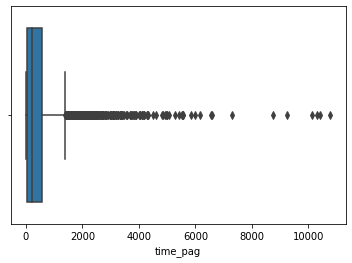

In [ ]:
# Criando um gráfico boxplor para vizualizar a variável "time_pag".
sns.boxplot(data=df, x=df.time_pag)

Quanto fazemos o boxplot fica mais evidente ainda a presença destes outliers.



In [ ]:
# Criando um dataset apenas com os outliers da variável de tempo de exercício físico semanal.
# Foram definidos como outliers aqueles que tiveram tempo maior ou igual que 1500 minutos semanais

df_outliers_exer = df[df.time_pag >= 1500]

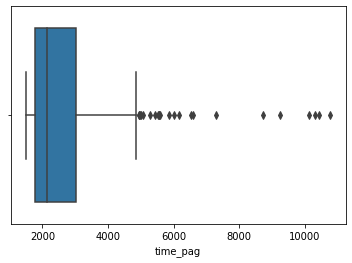

In [ ]:
# Criando um gráfico boxplor para vizualizar a variável "time_pag" para os outliers.
sns.boxplot(data=df_outliers_exer, x=df_outliers_exer.time_pag)

In [ ]:
# Fazendo análise estatística do grupo de outliers.
df_outliers_exer.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,347.0,36615.52,2980.51,31139.00,34260.00,36763.00,39170.00,41460.00
dpq1,347.0,0.27,0.66,0.00,0.00,0.00,0.00,3.00
dpq2,347.0,0.25,0.58,0.00,0.00,0.00,0.00,3.00
dpq3,347.0,0.50,0.83,0.00,0.00,0.00,1.00,3.00
dpq4,347.0,0.55,0.74,0.00,0.00,0.00,1.00,3.00
dpq5,347.0,0.27,0.63,0.00,0.00,0.00,0.00,3.00
dpq6,347.0,0.15,0.48,0.00,0.00,0.00,0.00,3.00
dpq7,347.0,0.19,0.47,0.00,0.00,0.00,0.00,3.00
dpq8,347.0,0.13,0.45,0.00,0.00,0.00,0.00,3.00
dpq9,347.0,0.06,0.32,0.00,0.00,0.00,0.00,3.00


Características das pessoas que pertencem aos outliers da variável tempo de exercício físico semanal.

*   Idade média: 35 anos.
*   Pontuação média questionário depressão: 2,36.
*   Tempo médio de exerício físico semanal: 2641,72 minutos.
*   Quantidade de outliers: 347.

Podemos observar que este grupo possui baixa pontuação média no questionário de depressão, além de que até o percentil de 75% o valor de 3 apresentado está relacionado a pessoas do grupo "sem sintomas", embora exista também um valor máximo de 24, que pertence ao grupo "sintomas severos".

O tempo médio de exercício físico deste grupo, de 2642 minutos (aproximado), representa mais de 6 horas de treino diários, que apesar de possíveis, são elevados. 

São 347 pessoas presentes neste grupo, representando aproximadamente 7,4% da população total, de 4702.

Fica o questionamento se estes outliers são dados incorretos ou se está sendo aplicada uma somatória de minutos que inclui pesos diferentes para determinados tipos de atividade.

Neste trabalho vamos estar atentos a estes valores outliers de tempo de atividade física semanal, mas não vamos exluí-los da análise por não ter a certeza que não se trata de uma somatória de minutos com pesos diferentes.

In [ ]:
# Fazendo análise estatística das variáveis quantitativas sobre alimentação saudável.
df[vars_quant_healthy].describe().round(2)

,hei1_total_veg,hei2_green_bean,hei3_total_fruit,hei4_whole_fruit,hei5_whole_grain,hei6_total_dairy,hei7_total_prot,hei8_seaplant_prot,hei9_fat_acid,hei10_sodium,hei11_refined_grain,hei12_saturated_fat,hei13_add_sugar,hei14_total_score
count,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00,4702.00
mean,3.20,1.80,2.48,2.36,1.77,3.77,4.44,2.58,4.71,4.75,5.83,6.03,6.20,49.93
std,1.46,2.13,1.95,2.17,1.91,1.59,1.00,2.17,3.23,3.41,3.48,3.18,3.34,12.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,2.07,0.00,0.44,0.00,0.00,2.62,4.17,0.00,2.01,1.58,3.00,3.65,3.71,40.93
50%,3.22,0.06,2.31,2.08,1.04,4.94,5.00,2.56,4.44,4.82,6.26,6.37,6.85,49.46
75%,4.80,4.44,4.91,5.00,3.41,5.00,5.00,5.00,7.26,7.63,9.30,8.96,9.40,58.06
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Não observamos nenhum valor fora do esperado para as respostas do questionário de alimentação saúdavel.

Agora vamos analisar separadamente algumas variáveis

In [ ]:
# Fazendo análise estatística da variável idade.
df.age.describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: age, dtype: float64

Infomações da população do dataset:


*   Idade máxima: 86 anos.
*   Idade mínima: 18 anos.
*   Idade média: 45 anos.


In [ ]:
# Fazendo análise estatística da variável phq9.
df.phq9.describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq9, dtype: float64

Infomações do questionário sobre depressão:


*   Pontuação máxima: 27.
*   Pontuação mínima: 0.
*   Pontuação média: 2,7.

A pontuação média indica que, na média, a população não aprenseta sintomas de depressão, já uma pontuação até 5 representa o grupo de pessoas sem sintomas.


In [ ]:
# Fazendo análise estatística do grupo classificado com "sintomas severos" de depressão.
df[df.phq_grp == 'sintomas severos'].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,24.0,36358.33,2363.52,32540.00,34574.00,36584.00,37602.00,41398.00
dpq1,24.0,2.46,0.88,0.00,2.00,3.00,3.00,3.00
dpq2,24.0,2.67,0.64,1.00,2.75,3.00,3.00,3.00
dpq3,24.0,2.83,0.38,2.00,3.00,3.00,3.00,3.00
dpq4,24.0,2.79,0.51,1.00,3.00,3.00,3.00,3.00
dpq5,24.0,2.42,0.97,0.00,2.00,3.00,3.00,3.00
dpq6,24.0,2.79,0.51,1.00,3.00,3.00,3.00,3.00
dpq7,24.0,2.71,0.62,1.00,3.00,3.00,3.00,3.00
dpq8,23.0,2.26,1.01,0.00,2.00,3.00,3.00,3.00
dpq9,24.0,1.96,1.00,0.00,1.00,2.00,3.00,3.00


Características das pessoas do grupo classificado com "sintomas severos" de depressão.

*   Idade média: 42 anos.
*   Pontuação média questionário depressão: 22,79.
*   Tempo médio de exerício físico semanal: 449,95 minutos.
*   Quantidade de pessoas classificadas com "sintomas severos": 24.

### Gráficos de histograma

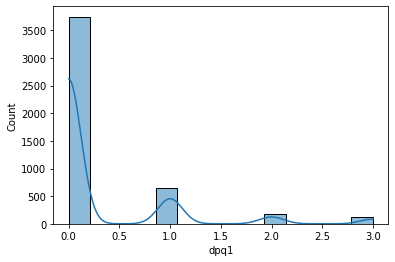

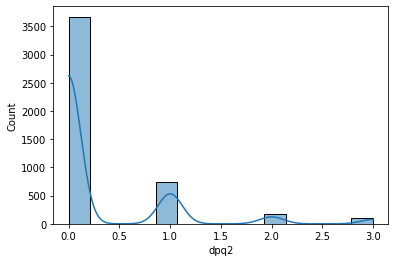

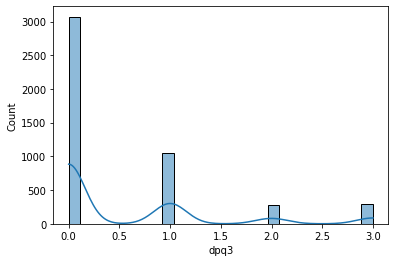

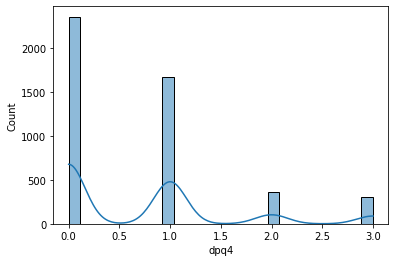

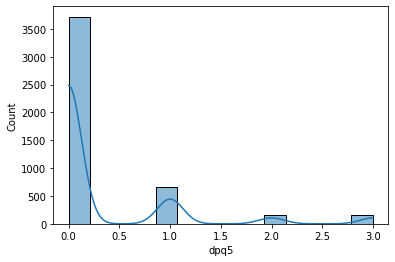

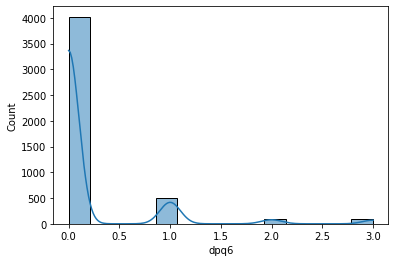

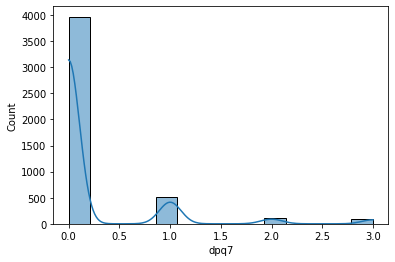

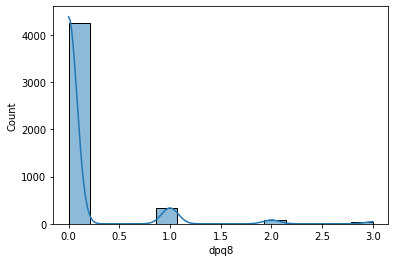

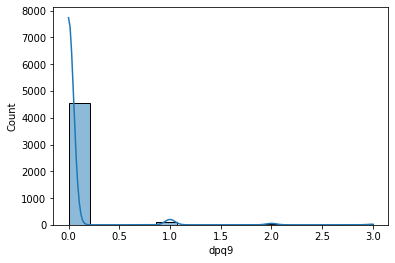

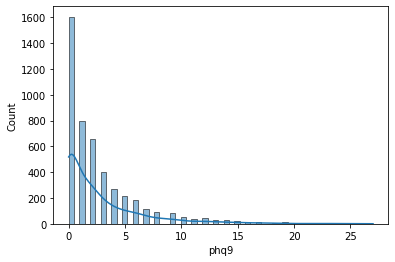

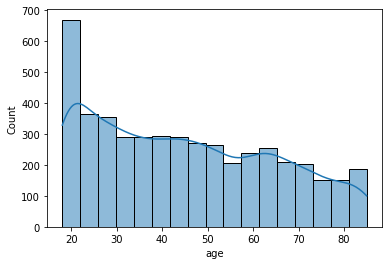

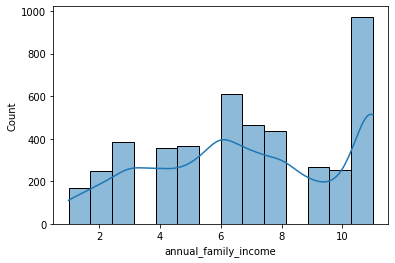

In [ ]:
# Criando um loop para plotar histogramas de todas as variáveis quantitativas sobre depressão.
for var in vars_quant_depre:
  sns.histplot(df[var], kde=True)
  plt.show()

Podemos observar nos histogramas que:

* A maioria da população possue baixa pontuação em todas as perguntas relacionadas a depressão, tal como sua pontuação geral.
* A maior quantidade de pessoas possue idade próxima a 20 anos, sendo que conforme a idade aumenta, diminui a frequência destas pessoas nesta população.
* Na renda familiar, existe um pico de pessoas com o índice 11, que representa US\$ 75000 por ano. Além disso, podemos observar uma maior concentração no índice 6, de US\$ 25000 a US\$ 34999, que vai diminuindo a frequência tanto para valores mais baixos, quanto para valores maiores (exceto índice 11).

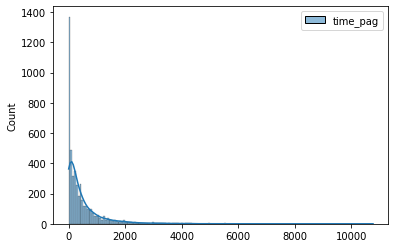

In [ ]:
# Criando histograma da variável "time_pag"
sns.histplot(df[vars_quant_exerc], kde=True)

Podemos observar também que a grande maioria da população não pratica muitos minutos de atividade física por semana.

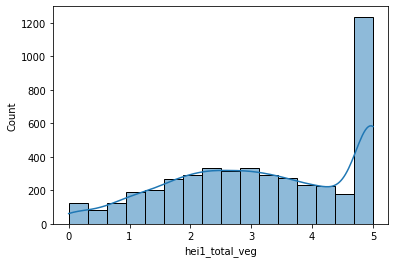

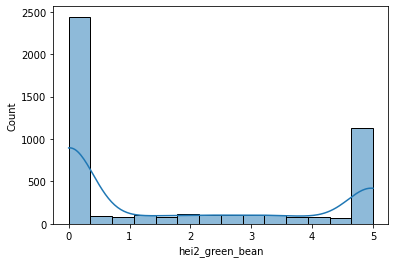

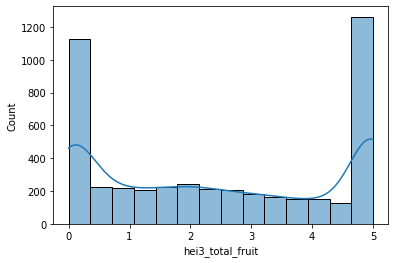

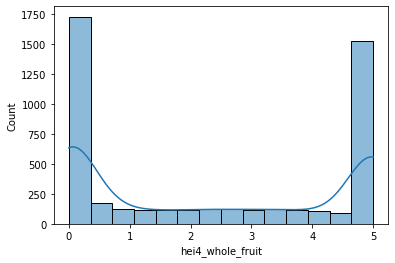

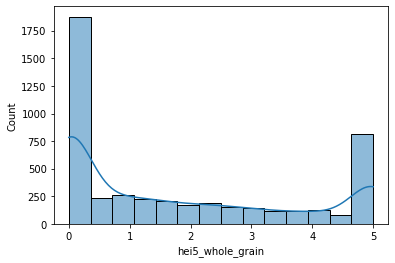

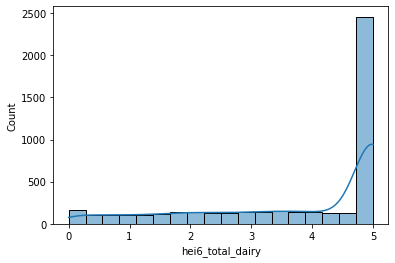

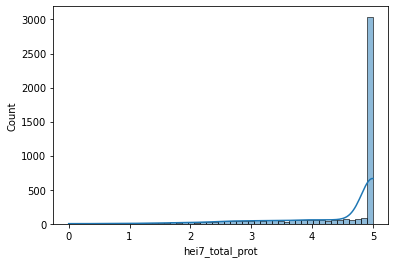

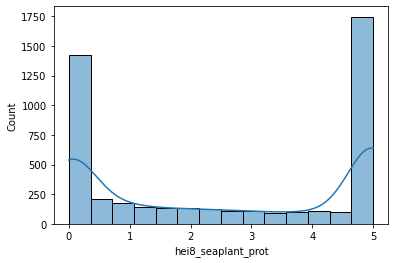

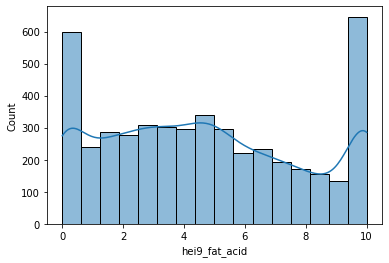

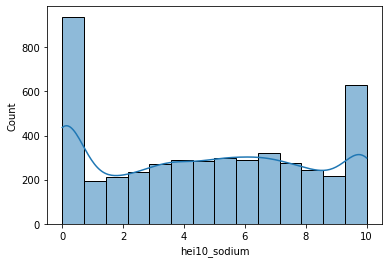

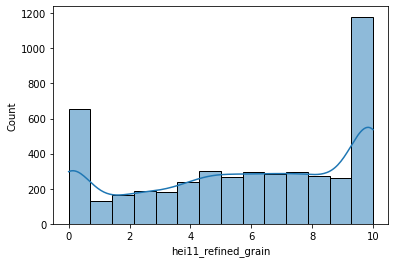

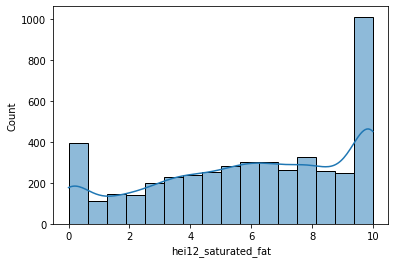

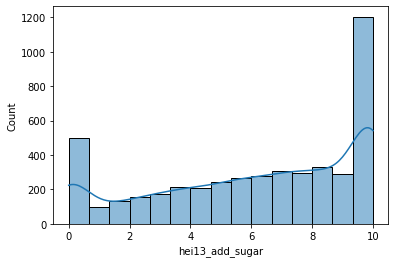

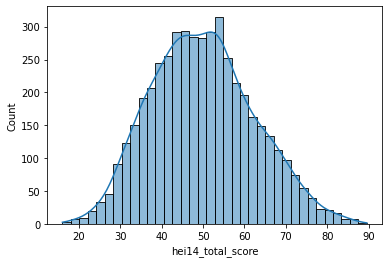

In [ ]:
# Criando um loop para plotar histogramas de todas as variáveis quantitativas sobre hábitos saudáveis.
for var in vars_quant_healthy:
  sns.histplot(df[var], kde=True)
  plt.show()

Podemos observar que, diferentemente do questionário sobre depressão, onde vimos que em todas as perguntas existia uma maior concentração de pessoas com baixa pontuação, neste questionário sobre alimentação temos uma maior variedade de pontuação nas respostas.

Existem perguntas, como hei6 e hei7, por exemplo, com uma predominância de alta pontuação. Hei2 e hei5, apresentam uma maior ocorrência de baixa pontuação, já perguntas como a hei9, existe um maior equilíbrio entre a pontuação máxima e mínima. Desta forma, observamos que existe uma característica de pontuação nestas perguntas de ter maior ocorrencia nos limites de pontuação, embora existam ocorrências nas pontuações medianas também.

O histograma da pontuação total se assemelha a uma distribuição normal.

## EDA bi-variada para encontrar relação entre variáveis e estabelecer hipóteses.

### Análise bi-variada com a função groupby

In [ ]:
# Criando uma lista com as variáveis chave definidas que serão utilizadas para a análise.
vars_quant_analysis = [
    "phq9",
    "age",
    "annual_family_income",
    "time_pag", 
    "hei14_total_score"
]

In [ ]:
# Loop para fazer uma correlação dos grupos de classificação de sintomas de depressão 
# com as variáveis de análise definidas no passo anterior.
from IPython.display import display

for var in vars_quant_analysis:
    display(df[['phq_grp', var]].groupby('phq_grp').describe().round(2))

phq9                                       \
                                 count   mean   std   min   25%   50%   75%   
phq_grp                                                                       
sem sintomas                    3726.0   1.18  1.29   0.0   0.0   1.0   2.0   
sintomas leves                   684.0   6.48  1.36   5.0   5.0   6.0   7.0   
sintomas moderadamente severos    72.0  16.62  1.41  15.0  15.0  16.5  18.0   
sintomas moderados               196.0  11.68  1.40  10.0  10.0  12.0  13.0   
sintomas severos                  24.0  22.79  1.89  20.0  21.0  22.5  24.0   

                                      
                                 max  
phq_grp                               
sem sintomas                     4.0  
sintomas leves                   9.0  
sintomas moderadamente severos  19.0  
sintomas moderados              14.0  
sintomas severos                27.0

age                                   \
                                 count   mean    std   min    25%   50%   
phq_grp                                                                   
sem sintomas                    3726.0  45.22  20.01  18.0  27.00  43.0   
sintomas leves                   684.0  43.39  19.72  18.0  25.00  41.0   
sintomas moderadamente severos    72.0  43.93  17.68  18.0  29.00  46.0   
sintomas moderados               196.0  45.12  18.48  18.0  27.00  46.0   
sintomas severos                  24.0  42.29  12.95  18.0  34.25  42.0   

                                             
                                  75%   max  
phq_grp                                      
sem sintomas                    62.00  85.0  
sintomas leves                  58.00  85.0  
sintomas moderadamente severos  56.25  85.0  
sintomas moderados              59.00  85.0  
sintomas severos                53.00  64.0

annual_family_income                        \
                                              count  mean   std  min  25%   
phq_grp                                                                     
sem sintomas                                 3602.0  7.07  3.04  1.0  5.0   
sintomas leves                                647.0  6.45  3.09  1.0  4.0   
sintomas moderadamente severos                 70.0  5.19  2.71  1.0  3.0   
sintomas moderados                            190.0  5.51  3.16  1.0  3.0   
sintomas severos                               22.0  4.09  2.29  1.0  3.0   

                                                  
                                50%    75%   max  
phq_grp                                           
sem sintomas                    7.0  10.00  11.0  
sintomas leves                  6.0   9.00  11.0  
sintomas moderadamente severos  5.0   7.00  11.0  
sintomas moderados              5.0   8.00  11.0  
sintomas severos                3.0   5.75  11.0

time_pag                                       \
                                  count    mean      std  min    25%     50%   
phq_grp                                                                        
sem sintomas                     3726.0  502.77   797.85  0.0  55.43  239.03   
sintomas leves                    684.0  468.83   843.67  0.0  30.36  187.07   
sintomas moderadamente severos     72.0  253.33   515.92  0.0   5.20  118.89   
sintomas moderados                196.0  291.65   542.30  0.0   0.00   92.38   
sintomas severos                   24.0  449.95  1212.78  0.0   0.00   17.12   

                                                  
                                   75%       max  
phq_grp                                           
sem sintomas                    623.56  10777.83  
sintomas leves                  499.92   7302.54  
sintomas moderadamente severos  316.57   4034.00  
sintomas moderados              325.64   4115.15  
sintomas severos                210.00   5536.15

hei14_total_score                              \
                                           count   mean    std    min    25%   
phq_grp                                                                        
sem sintomas                              3726.0  50.27  12.45  16.06  41.21   
sintomas leves                             684.0  49.02  11.96  16.49  40.57   
sintomas moderadamente severos              72.0  46.74  10.87  25.32  39.17   
sintomas moderados                         196.0  48.49  11.53  21.63  40.03   
sintomas severos                            24.0  43.88  12.88  23.40  34.36   

                                                     
                                  50%    75%    max  
phq_grp                                              
sem sintomas                    49.88  58.57  89.53  
sintomas leves                  48.42  56.83  82.95  
sintomas moderadamente severos  45.34  55.10  68.23  
sintomas moderados              47.23  56.66  83.30  
sintomas severos                42.18  51.44  79.89

Foram escolhidos os parâmetros quantitativos: ph19, age, annual_family_income, time_pag e hei14_total score, por serem os valores principais relacionados a população que descrevem seu perfil, classe e também classificação quanto a depressão, exercícios físicos e hábitos saudáveis. A partir deste ponto vamos avaliar estatisticamente estes valores para os grupos (variáveis qualitativas) defidos por: pessoas "sem sintomas", com "sintomas leves", "sintomas moderadamente severos", "sintomas moderados" e "sintomas severos".

Análise para:

* phq9: claramente a pontuação aumenta conforme a classificação de sintomas da pessoa, assim como esperado, variando entre 1,18 na média para pessoas "sem sintomas" e 22,79 para pessoas com "sintomas moderados".
* age: varia entre 42 e 45 anos aproximadamente para todos os grupos, não apresentando uma tendência. A idade máxima para pessoas com "sintomas severos" foi de 64 anos, aproximadamente 20 anos a menos que a idade máxima dos outros grupos.
* annual_family_income: a média diminui conforme os grupos de classificação de sintomas de depressão aumentam, o que nos faz levantar a hipótese de que pessoas com menor renda familiar tender a ter mais sintomas de depressão.
* time_pag: os grupos "sem sintomas" e com "sintomas leves" apresentam médias superiores de tempo de exerício físico em comparação aos grupos com "sintomas moderados" e "sintomas moderadamente severos", o que nos indica que as pessoas que praticam mais exercícios físicos tendem a ter menos sintomas de depressão. Porém quando analisamos o grupo mais crítico, com "sintomas severos", observamos que a média de exercício físico sobe novamente para valores próximos ao grupo de "sintomas leves", o que não está de acordo com a hipótese sendo levantada. Agora analisando a mediana, podemos agora sim ver claramente uma diminuição conforme os sintomas aumentam, além de também ressaltar que analisando os valores máximos (os outliers que não foram descartados), se apresentam predominantemente nos grupos "sem sintomas" e com "sintomas leves", o que nos faz levantar sim a hipótese de que quanto maior a quantidade de exercício físico praticado, menor tende a ter a ocorrência de sintomas de depressão na pessoa.
* hei14_total_score: apesar das diferenças aparentarem não ser tão expressivas, podemos observar sim uma tendência, embora pequena, de que pessoas que possuem hábitos alimentares saudáveis estejam presentes nos grupos de classificação com menos sintomas de depressão. Sendo assim, vamos elaborar uma hipótese para testar isso também.


Hipóteses levantadas:  
1) Pessoas com menor renda familiar, tendem a ter mais sintomas de depressão.  
2) Pessoas que praticam mais exercício físico, tendem a ter menos sintomas de depressão.  
3) Pessoas que têm hábitos alimentares saudáveis, tendem a ter menos sintomas de depressão.

### Análise bi-variada com Box Plot

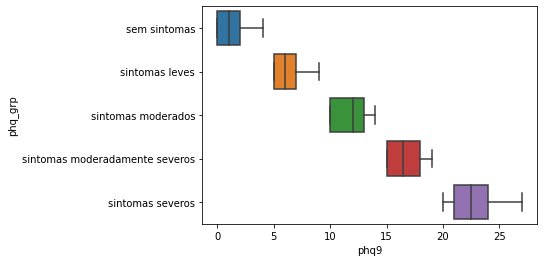

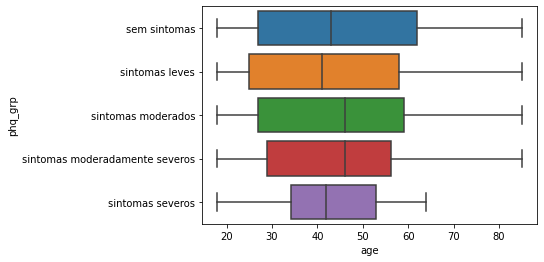

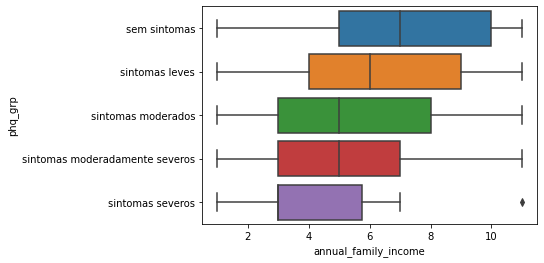

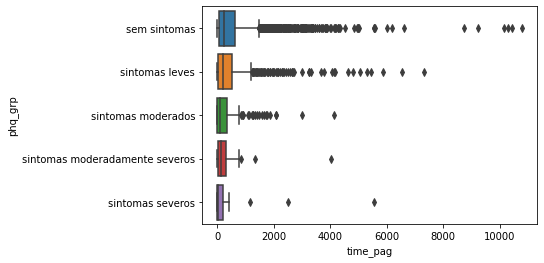

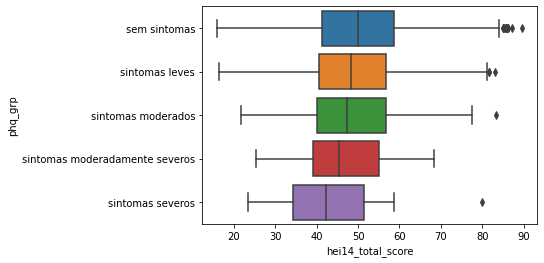

In [ ]:
# Loop para plotar gráficos boxplot dos grupos de classificação de sintomas de 
# depressão com as variáveis de análise definidas no passo anterior.
for var in vars_quant_analysis:
  sns.boxplot(data=df, x=df[var], y=df.phq_grp)
 # sns.histplot(df[var], kde=True)
  plt.show()

Analisando graficamente no boxplot, podemos novamente observar que as 3 hipóteses sobre renda familiar, exercício físico e alimentação saudável, podem ser mantidas pois podemos observar graficamente as mesmas tendências.

Analisando o gráfico de idade, vamos propor uma nova hipótese, já que observamos que o tamanho da concentração de 50% dos dados é menor que as demais, se concentrando entre 35 e pouco mais de 50 anos, sendo que não temos pessoas mais com 70 anos que apresentem "sintomas severos", em comparação com os outros grupos que possuem pessoas com mais de 80 anos. Isso pode nos indicar algum índice de mortalidade? Não temos pessoas mais velhas porque devido a doença, elas não chegariam a tal idade? Ou é uma tendência mesmo de que, pessoas mais velhas não apresentam "sintomas severos" de depressão. Neste trabalho vamos elaborar uma hipótese seguindo essa última observação para analisarmos.

Hipótese levantada:  
4) Pessoas com mais idade tendem a apresentar menos sintomas de depressão.

### Análise bi-variada com gráfico de barras

In [ ]:
# Função para gerar um gráfico de barras a partir de um dataframe, uma variável
# e um grupo de classificação desta variável
def grafico_barras_prop_grp(data, variable, grp):
    (data
     .groupby(variable)[grp]
     .value_counts(normalize=True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.catplot, "data"), x = variable, y = "Proporção", hue = grp, kind = "bar"))
    plt.ylim(0,1)
    plt.xticks(rotation = -45)
    plt.show()

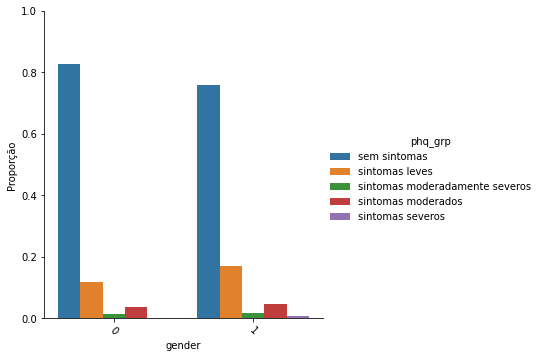

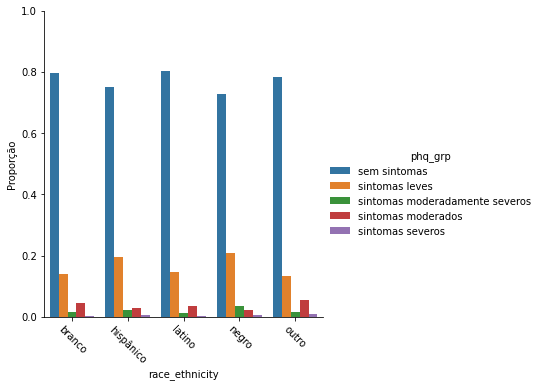

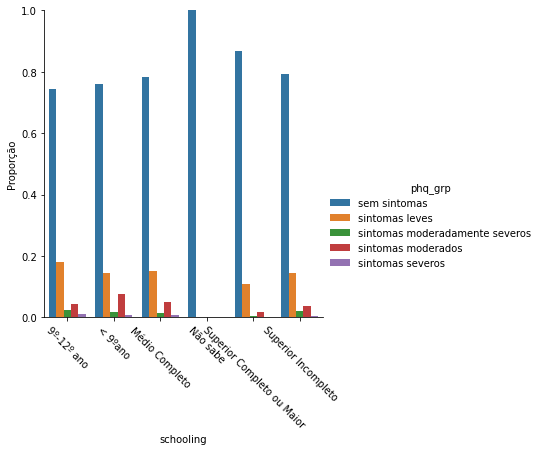

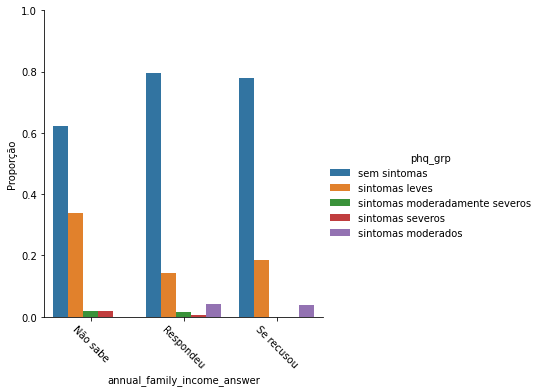

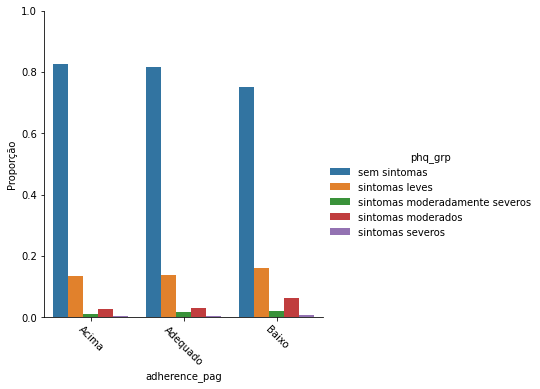

In [ ]:
# Loop para plotar gráficos de barra dos grupos de classificação de sintomas de 
# depressão com as variáveis de análise definidas no passo anterior.
for var in vars_quali[0:-1]:
    grafico_barras_prop_grp(df, var, grp = 'phq_grp')

Analisando os gráficos de barra, vamos criar outra hipótese, relacionada com o gênero da pessoa. Podemos observar que existe uma, aparentemente pequena, diferença entre o número de casos com sintomas em mulheres do que em homens, portanto vamos criar a hipótese de que as mulheres tendem a ter maiores sintomas de depressão que os homens.

Hippótese criada:   
5) Mulheres tendem a aprensetam mais sintomas de depressão.

### Análise bi-variada com o mapa de calor de correlação.

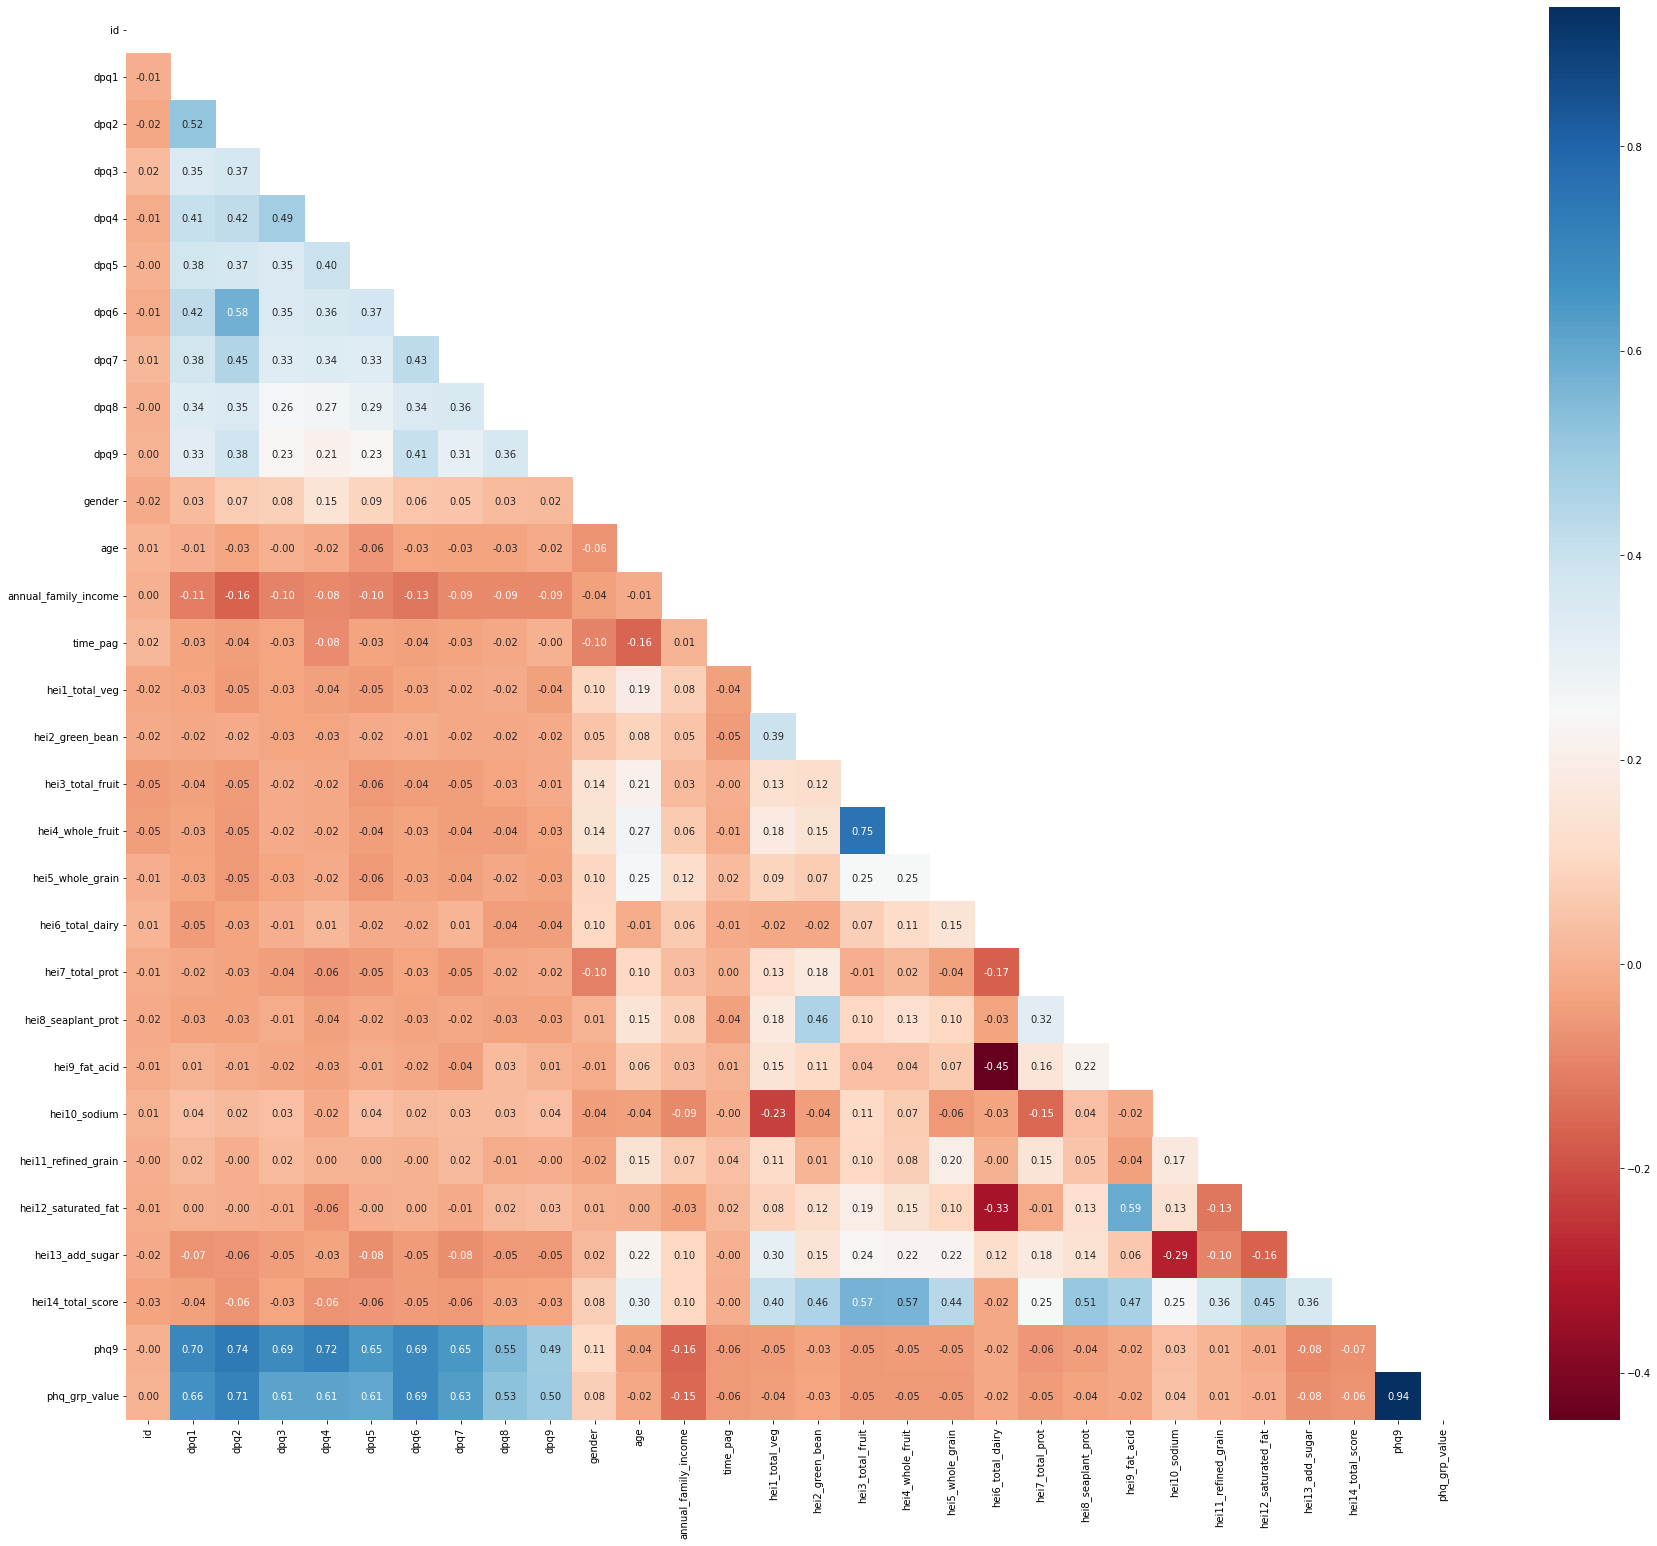

In [ ]:
# Plotando a matriz de correlações usando um Heatmap ("mapa de calor").
sns.set_context(font_scale=1.9)
plt.figure(figsize=(30,26))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df.corr())))
plt.show()

No mapa de calor de correlação das variáveis observamos a linha da variável "phq9", que é o nosso interesse neste estudo, representando a pontuação máxima da pessoa em relação ao sintomas de depressão apresentados.

Nesta linha, não observamos nenhuma correlação forte que nos leve a elaboração de alguma outra hipótese além das que já foram levantadas.

### Hipóteses levantadas.

* Pessoas com menor renda familiar, tendem a ter mais sintomas de depressão.  
* Pessoas que praticam mais exercício físico, tendem a ter menos sintomas de depressão.  
* Pessoas que têm hábitos alimentares saudáveis, tendem a ter menos sintomas de depressão.
* Pessoas com mais idade tendem a apresentar menos sintomas de depressão.
* Mulheres tendem a aprensetam mais sintomas de depressão.

## Teste de hipóteses.

### Hipótese: Pessoas com menor renda familiar, tendem a ter mais sintomas de depressão.

H0: Não existe diferença entre os grupos de depressão com relação à renda anual familiar.  
H1: Existe pelo menos uma diferença de renda anual familiar entre os grupos de sintomas de depressão.

Tipo de teste: F da ANOVA

In [ ]:
# Rodando função para o teste F da ANOVA com as variáveis "phq_grp" e "annual_family_income".
from scipy.stats import f_oneway

df_aux = df[["phq_grp", "annual_family_income"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp == 'sem sintomas')]["annual_family_income"],
                   df_aux[(df_aux.phq_grp == 'sintomas leves')]["annual_family_income"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderados')]["annual_family_income"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderadamente severos')]["annual_family_income"],
                   df_aux[(df_aux.phq_grp == 'sintomas severos')]["annual_family_income"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=26.117, p=0.000


Como p < 0,05, rejeitamos a hipótese nula, ou seja, existe diferença de renda anual familiar entre os grupos de sintomas de depressão.

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas de depressão com relação à renda anual familiar, iremos realizar o teste de Tukey de comparações multiplas para investigar quais diferenças são signiticativas:

In [ ]:
# Rodando função para o teste Tukey com as variáveis "phq_grp" e "annual_family_income".
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df_aux["annual_family_income"],
                  df_aux['phq_grp'],
                  alpha = 0.05)

print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
                  sem sintomas                 sintomas leves  -0.6127  0.001 -0.9677 -0.2576   True
                  sem sintomas sintomas moderadamente severos  -1.8798  0.001 -2.8832 -0.8764   True
                  sem sintomas             sintomas moderados   -1.555  0.001 -2.1739 -0.9361   True
                  sem sintomas               sintomas severos  -2.9746  0.001 -4.7528 -1.1965   True
                sintomas leves sintomas moderadamente severos  -1.2671 0.0085 -2.3133 -0.2209   True
                sintomas leves             sintomas moderados  -0.9423 0.0017 -1.6284 -0.2562   True
                sintomas leves               sintomas severos   -2.362 0.0032 -4.1646 -0.55

De acordo com o teste de Tukey podemos analisar que as diferenças existem com:
* Grupo "sem sintomas" com "sintomas leves".
* Grupo "sem sintomas" com "sintomas moderadamente severos".
* Grupo "sem sintomas" com "sintomas moderados".
* Grupo "sem sintomas" com "sintomas severos".
* Grupo "sintomas leves" com "sintomas moderadamente severos".
* Grupo "sintomas leves" com "sintomas moderados".
* Grupo "sintomas leves" com "sintomas severos".

E não existem diferenças entre os grupos:  
* Grupo "sintomas moderadamente severos" com "sintomas moderados".
* Grupo "sintomas moderadamente severos" com "sintomas severos".
* Grupo "sintomas moderados" com "sintomas severos".

### Hipótese: Pessoas que praticam mais exercício físico, tendem a ter menos sintomas de depressão.

H0: Não existe diferença entre os grupos de depressão com relação ao tempo de prática de exercício físico.  
H1: Existe pelo menos uma diferença de tempo de prática de exercício físico entre os grupos de sintomas de depressão.

Tipo de teste: F da ANOVA

In [ ]:
# Rodando função para o teste F da ANOVA com as variáveis "phq_grp" e "time_pag".

df_aux = df[["phq_grp", "time_pag"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp == 'sem sintomas')]["time_pag"],
                   df_aux[(df_aux.phq_grp == 'sintomas leves')]["time_pag"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderados')]["time_pag"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderadamente severos')]["time_pag"],
                   df_aux[(df_aux.phq_grp == 'sintomas severos')]["time_pag"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.976, p=0.001


Como p < 0,05, rejeitamos a hipótese nula, ou seja, existe diferença de tempo de prática de exercício físico entre os grupos de sintomas de depressão.

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas de depressão com relação ao tempo de prática de exercício físico, iremos realizar o teste de Tukey de comparações multiplas para investigar quais diferenças são signiticativas:

In [ ]:
# Rodando função para o teste Tukey com as variáveis "phq_grp" e "time_pag".

tukey = pairwise_tukeyhsd(df_aux["time_pag"],
                  df_aux['phq_grp'],
                  alpha = 0.05)

print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
            group1                         group2              meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------------------
                  sem sintomas                 sintomas leves  -33.9377 0.8228 -124.1622  56.2868  False
                  sem sintomas sintomas moderadamente severos -249.4358  0.064 -507.5099   8.6384  False
                  sem sintomas             sintomas moderados -211.1161 0.0027 -370.0655 -52.1666   True
                  sem sintomas               sintomas severos  -52.8166    0.9 -496.9805 391.3473  False
                sintomas leves sintomas moderadamente severos -215.4981 0.1841 -484.2313  53.2351  False
                sintomas leves             sintomas moderados -177.1784  0.047  -352.906  -1.4508   True
                sintomas leves               sintomas s

De acordo com o teste de Tukey podemos analisar que as diferenças existem com:
* Grupo "sem sintomas" com "sintomas moderados".
* Grupo "sintomas leves" com "sintomas moderados".  

Os demais obtiveram valores de p>0,05 portanto não rejeitaram a hipótese nula H0.


### Hipótese: Pessoas que têm hábitos alimentares saudáveis, tendem a ter menos sintomas de depressão.

H0: Não existe diferença entre os grupos de depressão com relação aos hábitos alimentares saudáveis.  
H1: Existe pelo menos uma diferença de  hábitos alimentares saudáveis entre os grupos de sintomas de depressão.

Tipo de teste: F da ANOVA.

In [ ]:
# Rodando função para o teste F da ANOVA com as variáveis "phq_grp" e "hei14_total_score".

df_aux = df[["phq_grp", "hei14_total_score"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp == 'sem sintomas')]["hei14_total_score"],
                   df_aux[(df_aux.phq_grp == 'sintomas leves')]["hei14_total_score"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderados')]["hei14_total_score"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderadamente severos')]["hei14_total_score"],
                   df_aux[(df_aux.phq_grp == 'sintomas severos')]["hei14_total_score"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.966, p=0.001


Como p < 0,05, rejeitamos a hipótese nula, ou seja, existe diferença de hábitos alimentares saudáveis entre os grupos de sintomas de depressão.

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas de depressão com relação aos hábitos alimentares saudáveis, iremos realizar o teste de Tukey de comparações multiplas para investigar quais diferenças são signiticativas:

In [ ]:
# Rodando função para o teste Tukey com as variáveis "phq_grp" e "hei14_total_score".

tukey = pairwise_tukeyhsd(df_aux["hei14_total_score"],
                  df_aux['phq_grp'],
                  alpha = 0.05)

print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
                  sem sintomas                 sintomas leves  -1.2487 0.1061  -2.6477 0.1503  False
                  sem sintomas sintomas moderadamente severos   -3.534 0.1129  -7.5356 0.4676  False
                  sem sintomas             sintomas moderados  -1.7822 0.2794  -4.2468 0.6824  False
                  sem sintomas               sintomas severos  -6.3938 0.0837 -13.2809 0.4933  False
                sintomas leves sintomas moderadamente severos  -2.2853  0.556  -6.4522 1.8816  False
                sintomas leves             sintomas moderados  -0.5335    0.9  -3.2583 2.1913  False
                sintomas leves               sintomas severos  -5.1451 0.2611 -12.1295 1.83

Realizando o teste de Tukey, não foi possível identificar onde é a diferença apresentada no teste F da ANOVA, já que todos os valores de p foram maiores que 0,05.

### Hipótese: Pessoas com mais idade tendem a apresentar menos sintomas de depressão.

H0: Não existe diferença entre os grupos de depressão com relação à idade.  
H1: Existe pelo menos uma diferença de idade entre os grupos de sintomas de depressão.

Tipo de teste: F da ANOVA.

In [ ]:
# Rodando função para o teste F da ANOVA com as variáveis "phq_grp" e "age".

df_aux = df[["phq_grp", "age"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_grp == 'sem sintomas')]["age"],
                   df_aux[(df_aux.phq_grp == 'sintomas leves')]["age"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderados')]["age"],
                   df_aux[(df_aux.phq_grp == 'sintomas moderadamente severos')]["age"],
                   df_aux[(df_aux.phq_grp == 'sintomas severos')]["age"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.387, p=0.236


Como p > 0,05, aceitamos a hipótese nula, ou seja, não existe associação entre idade e sintomas de depressão.

### Hipótese: Mulheres tendem a aprensetam mais sintomas de depressão.

H0: Não existe associação entre gênero e sintomas de depressão.
H1: Existe associação entre gênero e sintomas de depressão.

Tipo de teste: Qui-quadrado de independência.

In [ ]:
# Computando uma tabulação cruzada entre as variáveis "phq_grp" e "gender" para 
# utilizar na função do teste qui-quadrado.
crosstab = pd.crosstab(df['gender'],
                       df['phq_grp'])
crosstab

phq_grp,sem sintomas,sintomas leves,sintomas moderadamente severos,sintomas moderados,sintomas severos
gender,,,,,
0,1876,270,31,83,5
1,1850,414,41,113,19


In [ ]:
# Rodando função para o teste qui-quadrado com as variáveis "phq_grp" e "gender".
from scipy.stats import chi2_contingency

stat, p, df_chi2, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat, p))

stat = 38.404, p = 0.000


Como p < 0,05, rejeitamos a hipótese nula, ou seja, existe associação entre o gênero e sintomas de depressão.

## Perguntas TERA

### Qual é o perfil das pessoas saudáveis?

In [ ]:
# Plotando um boxplot da variável "hei14_total_score".
sns.boxplot(data=df, y=df.hei14_total_score)

NameError: ignored

In [ ]:
# Criando um dataframe filtrado apenas com as pessoas que possuem "hei14_total_score" maior ou igual a 60.
df_healthy = df[df.hei14_total_score >= 60]

NameError: ignored

In [ ]:
# Fazendo análise estatística das variáveis quantitativas do dataframe filtrado.
df_healthy.describe().round(2).T

#### Resposta

Perfil das pessoas que tem uma boa alimentação:
idade média de 54 anos
renda anual (US$) familiar entre 35.000 a 54.999
próximo a 500 minutos de atividade aeróbica por semana
média de score no questionário de depressão de 2,3 (dentre as pessoas sem sintomas)


### Qual o tipo de estudo está sendo empregado pelo NHANES? experimental ou observacional?

#### Resposta

Observacional.

### Quais outras variáveis/informações poderiam ter sido coletadas para esta análise.

#### Resposta

Atividade holística (meditação, yoga), acompanhamento psiquiatrico, acompanhamento psicoterapia, ingestão de bebidas alcoólicas e drogas, histórico familiar.